## Exploratory Data Analysis

In [25]:
# importing libraries
import numpy as nps
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [26]:
# loading data
df = pd.read_csv(r"C:\BritishAirways_DataScience\Data\Data_Cleaning.csv", index_col=0)

In [27]:
df

,Review,Date,Country,Rating,Verified,Cleaned_Review
0,✅ Trip Verified | Although transferring to thi...,15 May 2025,United States,5/10 rating,✅ Trip Verified,although transferring to this flight through h...
1,✅ Trip Verified | We are extremely grateful ...,8 May 2025,Switzerland,8/10 rating,✅ Trip Verified,we are extremely grateful to the crew of fligh...
2,✅ Trip Verified | I had an appalling experie...,29 April 2025,South Africa,10/10 rating,✅ Trip Verified,i had an appalling experience with british air...
3,"Not Verified | Good points, the cabin crew, t...",22 April 2025,United Kingdom,3/10 rating,❌ Not Verified,good points the cabin crew they were helpful p...
4,"Not Verified | It was a decent flight, reason...",22 April 2025,United Kingdom,6/10 rating,❌ Not Verified,it was a decent flight reasonable comfortable ...
...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,4 December 2014,United States,10/10 rating,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...
3496,YVR-LHR-AMS. An uneventful journey with BA but...,4 December 2014,Canada,8/10 rating,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...
3497,Have just completed four flights with British ...,4 December 2014,South Africa,5/10 rating,❌ Not Verified,have just completed four flights with british ...
3498,British Airways for some reason was incapable ...,4 December 2014,United States,9/10 rating,❌ Not Verified,british airways for some reason was incapable ...


<Axes: title={'center': 'Top 10 Countries by Review Count'}, xlabel='Country'>

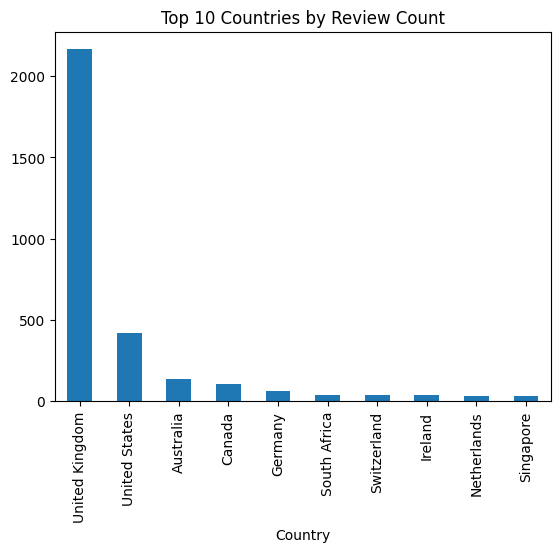

In [28]:
# top 10 Countries by Review Count
df['Country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Review Count')

<Axes: title={'center': 'Verified vs Not Verified Reviews'}, xlabel='Verified'>

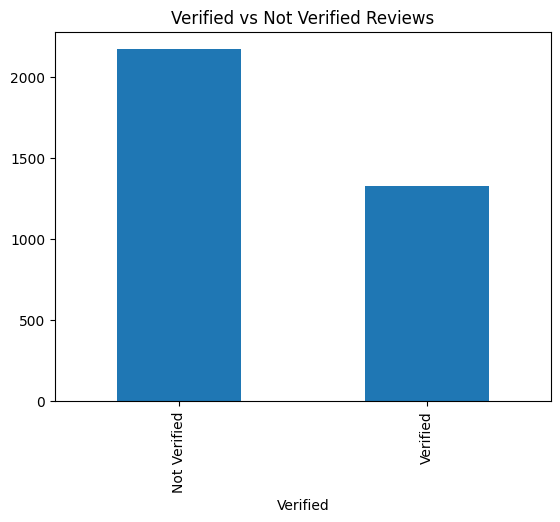

In [31]:
# comparing the verified and not verified reviews
df['Verified'] = df['Verified'].replace({
    '✅ Trip Verified': 'Verified',
    '❌ Not Verified': 'Not Verified'
})

df['Verified'].value_counts().plot(kind='bar', title='Verified vs Not Verified Reviews')

In [24]:
# converting the Rating col and making a new col for it
df['Rating (10)'] = df['Rating'].astype(str).str.extract(r'(\d+)/10')
df['Rating (10)'] = pd.to_numeric(df['Rating (10)'], errors='coerce').astype('Int64')

In [7]:
df[['Rating', 'Rating (10)']].head(10)

,Rating,Rating (10)
0,5/10 rating,5
1,8/10 rating,8
2,10/10 rating,10
3,3/10 rating,3
4,6/10 rating,6
5,6/10 rating,6
6,5/10 rating,5
7,1/10 rating,1
8,7/10 rating,7
9,9/10 rating,9


In [37]:
# dropping the Rating col
df.drop(columns=['Rating', 'Rating_Num'], inplace=True)

In [38]:
df

,Review,Date,Country,Verified,Cleaned_Review,Rating (10)
0,✅ Trip Verified | Although transferring to thi...,15 May 2025,United States,✅ Trip Verified,although transferring to this flight through h...,5
1,✅ Trip Verified | We are extremely grateful ...,8 May 2025,Switzerland,✅ Trip Verified,we are extremely grateful to the crew of fligh...,8
2,✅ Trip Verified | I had an appalling experie...,29 April 2025,South Africa,✅ Trip Verified,i had an appalling experience with british air...,10
3,"Not Verified | Good points, the cabin crew, t...",22 April 2025,United Kingdom,❌ Not Verified,good points the cabin crew they were helpful p...,3
4,"Not Verified | It was a decent flight, reason...",22 April 2025,United Kingdom,❌ Not Verified,it was a decent flight reasonable comfortable ...,6
...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,4 December 2014,United States,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...,10
3496,YVR-LHR-AMS. An uneventful journey with BA but...,4 December 2014,Canada,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...,8
3497,Have just completed four flights with British ...,4 December 2014,South Africa,❌ Not Verified,have just completed four flights with british ...,5
3498,British Airways for some reason was incapable ...,4 December 2014,United States,❌ Not Verified,british airways for some reason was incapable ...,9


In [43]:
# getting the mean for the Rating (10) col
mean_rating = df['Rating (10)'].mean()
print(mean_rating) 

4.51915380217267


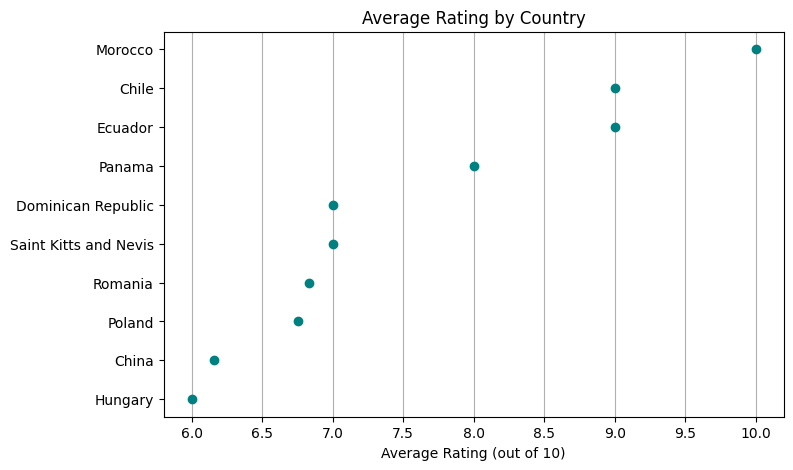

In [53]:
# avg rating by country
avg_rating_by_country_sorted = avg_rating_by_country.sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.plot(avg_rating_by_country_sorted.values, avg_rating_by_country_sorted.index, 'o', color='teal')
plt.xlabel('Average Rating (out of 10)')
plt.title('Average Rating by Country')
plt.grid(axis='x')
plt.gca().invert_yaxis()  
plt.show()

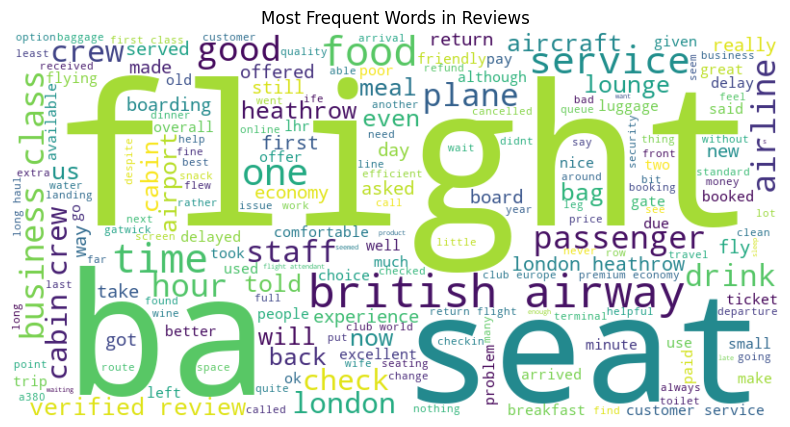

In [57]:
# word cloud to get the most frequent words in the reviews
text = ' '.join(df['Cleaned_Review'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

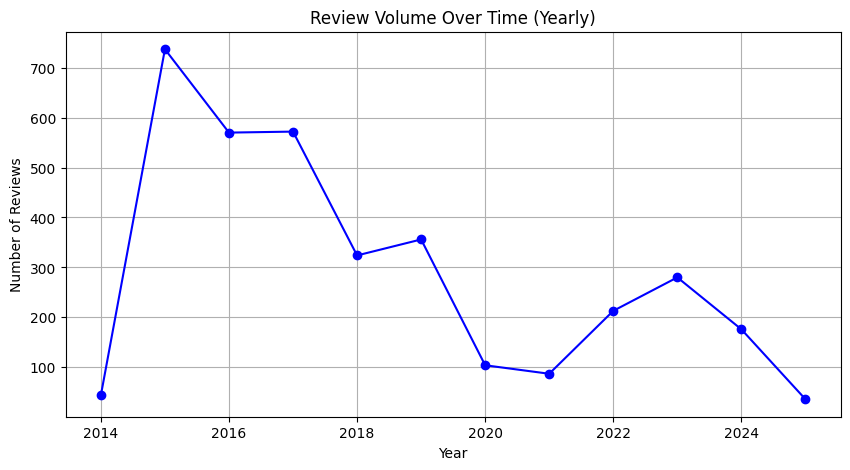

In [62]:
# review volume 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

reviews_per_year = df.groupby('Year').size()

plt.figure(figsize=(10, 5))
reviews_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Review Volume Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

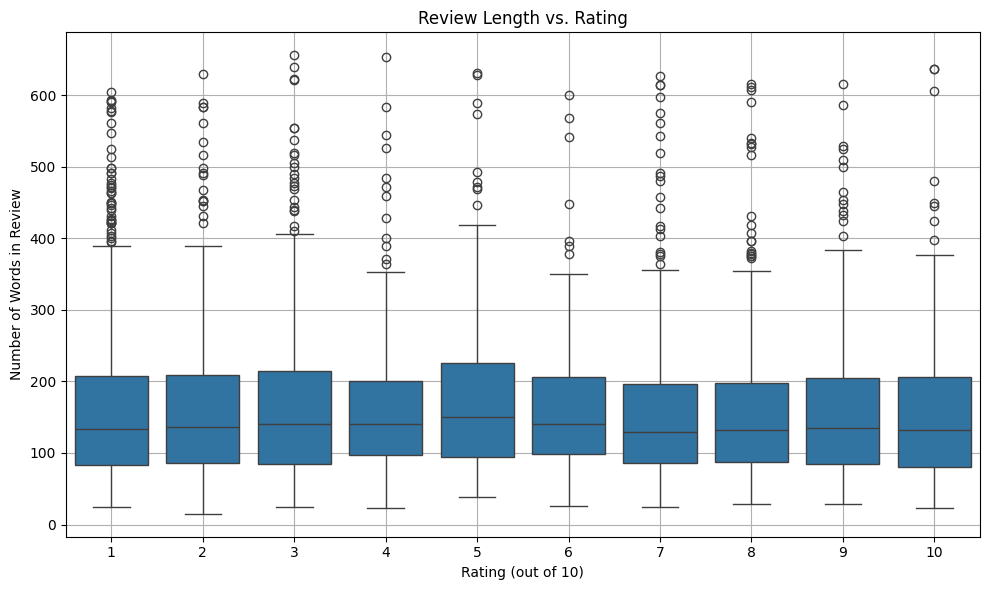

In [63]:
# visualizing the review length
df['Rating (10)'] = pd.to_numeric(df['Rating (10)'], errors='coerce')
df['Review_Length'] = df['Cleaned_Review'].astype(str).apply(lambda x: len(x.split()))
df = df.dropna(subset=['Rating (10)', 'Review_Length'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating (10)', y='Review_Length', data=df)
plt.title('Review Length vs. Rating')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Number of Words in Review')
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# countries count in the country col
df['Country'].nunique()

71

In [65]:
# getting the distinct countries
df['Country'].unique()

array(['United States', 'Switzerland', 'South Africa', 'United Kingdom',
       'Australia', 'Sweden', 'Netherlands', 'Iceland', 'Singapore',
       'Turkey', 'Canada', 'India', 'Germany', 'Morocco', 'Hong Kong',
       'Lebanon', 'Italy', 'New Zealand', 'Austria', 'Denmark', 'Belgium',
       'Nigeria', 'Japan', 'Ukraine', 'Ireland', 'Spain', 'China',
       'Ecuador', 'Romania', 'France', 'Kuwait', 'Poland', 'Qatar',
       'Greece', 'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile',
       'Czech Republic', 'Malaysia', 'Ghana', 'Bermuda', 'Botswana',
       'Brazil', 'Panama', 'Russian Federation', 'Philippines',
       'Bulgaria', 'Thailand', 'Argentina', 'Mexico',
       'Saint Kitts and Nevis', 'Vietnam', 'Norway', 'Jordan', 'Taiwan',
       'Slovakia', 'Israel', 'South Korea', 'Saudi Arabia', 'Hungary',
       'Portugal', 'Cayman Islands', 'Costa Rica', 'Egypt', 'Laos',
       'Indonesia', 'Bahrain', 'Dominican Republic', 'Luxembourg',
       'Finland'], dtype=object)

In [69]:
df

,Review,Date,Country,Verified,Cleaned_Review,Rating (10),YearMonth,Year,Review_Length
0,✅ Trip Verified | Although transferring to thi...,2025-05-15,United States,✅ Trip Verified,although transferring to this flight through h...,5,2025-05,2025,106
1,✅ Trip Verified | We are extremely grateful ...,2025-05-08,Switzerland,✅ Trip Verified,we are extremely grateful to the crew of fligh...,8,2025-05,2025,33
2,✅ Trip Verified | I had an appalling experie...,2025-04-29,South Africa,✅ Trip Verified,i had an appalling experience with british air...,10,2025-04,2025,271
3,"Not Verified | Good points, the cabin crew, t...",2025-04-22,United Kingdom,❌ Not Verified,good points the cabin crew they were helpful p...,3,2025-04,2025,209
4,"Not Verified | It was a decent flight, reason...",2025-04-22,United Kingdom,❌ Not Verified,it was a decent flight reasonable comfortable ...,6,2025-04,2025,108
...,...,...,...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,2014-12-04,United States,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...,10,2014-12,2014,81
3496,YVR-LHR-AMS. An uneventful journey with BA but...,2014-12-04,Canada,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...,8,2014-12,2014,125
3497,Have just completed four flights with British ...,2014-12-04,South Africa,❌ Not Verified,have just completed four flights with british ...,5,2014-12,2014,175
3498,British Airways for some reason was incapable ...,2014-12-04,United States,❌ Not Verified,british airways for some reason was incapable ...,9,2014-12,2014,169


In [71]:
df.to_csv('Data/EDA.csv', index=False, encoding='utf-8-sig')